In [1]:
# To get the values for each peak 

import numpy as np 
import pandas as pd

file_path = 'DataCSVFiles/Ba-133data.csv'
#file_path = 'DataCSVFiles/Cd-109data.csv'
#file_path = 'DataCSVFiles/Co-57data.csv'
#file_path = 'DataCSVFiles/Co-60data.csv'
#file_path = 'DataCSVFiles/Mn-54data.csv'
#file_path = 'DataCSVFiles/Na-22data.csv'  
#file_path = 'DataCSVFiles/Unknowndata.csv'
selected_columns = [0, 2]

df = pd.read_csv(file_path, delimiter=',', skiprows=21, usecols=selected_columns)
data_array = df.to_numpy()
#print(df)

for row in data_array:
    print(row)
max_value_in_column = np.max(data_array[:, 1])
print(max_value_in_column)
print(data_array)


# Ba-133: [56, 47130], [154,11761], [218,1284], [519,1267], and [603,2810]
# Cd-109: [28, 7142]
# Co-57: [225, 1608]
# Co-60: [54,600]
# Mn-54: [138, 173]
# Na-22: [138, 244], [840, 469]
# Unknown: [59, 3095], [1040, 1177]

[ 0 14]
[1 0]
[2 1]
[3 0]
[4 4]
[5 1]
[6 2]
[7 2]
[8 3]
[9 1]
[10  3]
[11  2]
[12  3]
[13  1]
[14  1]
[15  3]
[16  4]
[17  4]
[18  3]
[19  6]
[20  7]
[21 11]
[22  3]
[23  9]
[24 17]
[25  7]
[26 16]
[ 27 670]
[ 28 794]
[ 29 658]
[ 30 558]
[ 31 608]
[ 32 634]
[ 33 649]
[ 34 675]
[ 35 856]
[ 36 916]
[  37 1062]
[  38 1179]
[  39 1475]
[  40 1813]
[  41 2308]
[  42 2927]
[  43 3758]
[  44 4882]
[  45 6444]
[  46 8410]
[   47 11139]
[   48 14610]
[   49 18790]
[   50 23925]
[   51 29191]
[   52 34159]
[   53 39755]
[   54 43589]
[   55 46374]
[   56 47130]
[   57 45485]
[   58 42660]
[   59 38076]
[   60 33023]
[   61 28117]
[   62 23280]
[   63 18928]
[   64 15582]
[   65 12993]
[   66 10393]
[  67 8354]
[  68 6573]
[  69 5169]
[  70 4127]
[  71 3111]
[  72 2335]
[  73 1973]
[  74 1555]
[  75 1247]
[  76 1118]
[  77 1036]
[  78 1029]
[ 79 966]
[ 80 983]
[ 81 932]
[  82 1088]
[  83 1058]
[  84 1108]
[  85 1266]
[  86 1293]
[  87 1390]
[  88 1497]
[  89 1547]
[  90 1688]
[  91 1740]
[  92 18

In [3]:
# To be able to plot data with Gaussian fits

import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss_function(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

def fit_multiple_gaussians(x, y, peak_positions_and_amplitudes):
    fits = []
    
    for position, amplitude in peak_positions_and_amplitudes:
        x_range = x[(x >= position - 10) & (x <= position + 10)]
        y_range = y[(x >= position - 10) & (x <= position + 10)]
        
        initial_guess = [np.max(y_range), position, 1.0]
        
        params, _ = curve_fit(gauss_function, x_range, y_range, p0=initial_guess)
        fits.append(params)
    
    return fits

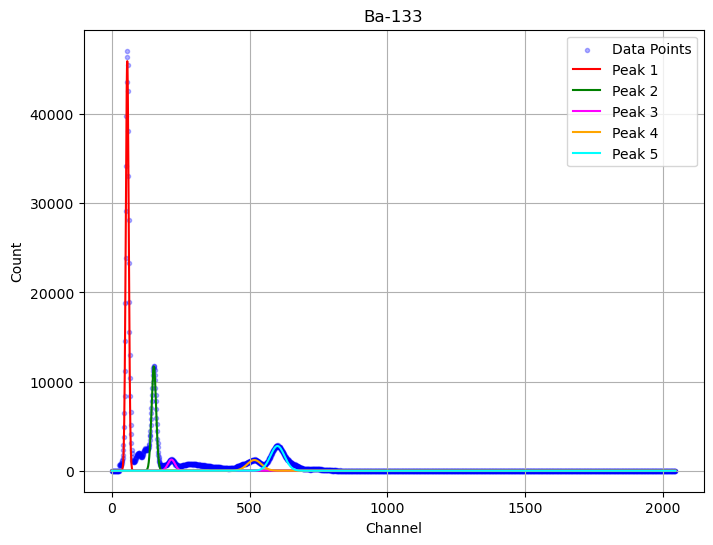

In [4]:
data = py.loadtxt('DataCSVFiles/Ba-133data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [56, 47130],
    [154, 11761],
    [218, 1284],
    [519, 1267],
    [603, 2810]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133')
plt.legend()
plt.grid(True)
plt.show()

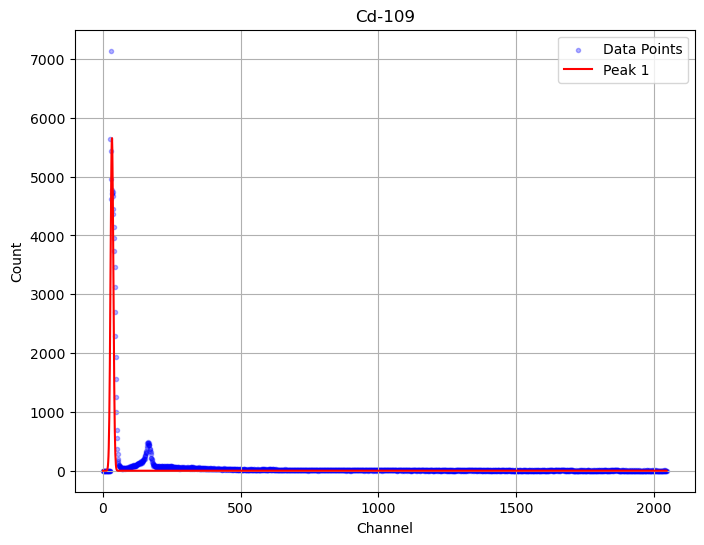

In [12]:
data = py.loadtxt('DataCSVFiles/Cd-109data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [28, 7142]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Cd-109')
plt.legend()
plt.grid(True)
plt.show()

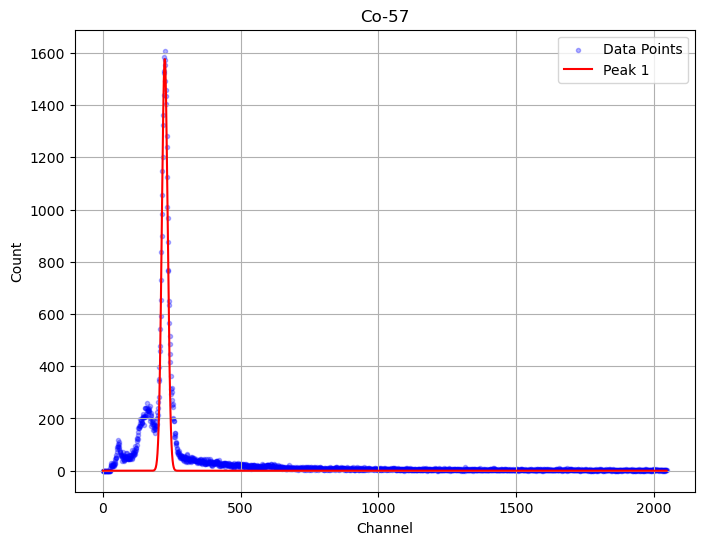

In [6]:
data = py.loadtxt('DataCSVFiles/Co-57data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [225, 1608]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-57')
plt.legend()
plt.grid(True)
plt.show()

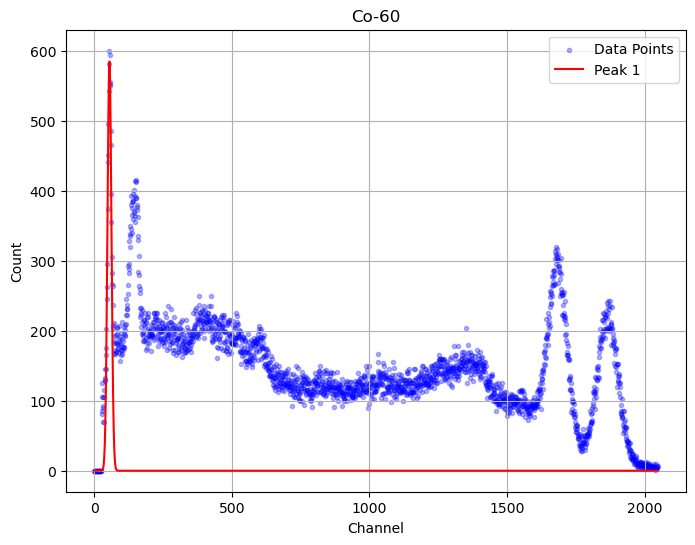

In [8]:
data = py.loadtxt('DataCSVFiles/Co-60data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [54, 600]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-60')
plt.legend()
plt.grid(True)
plt.show()

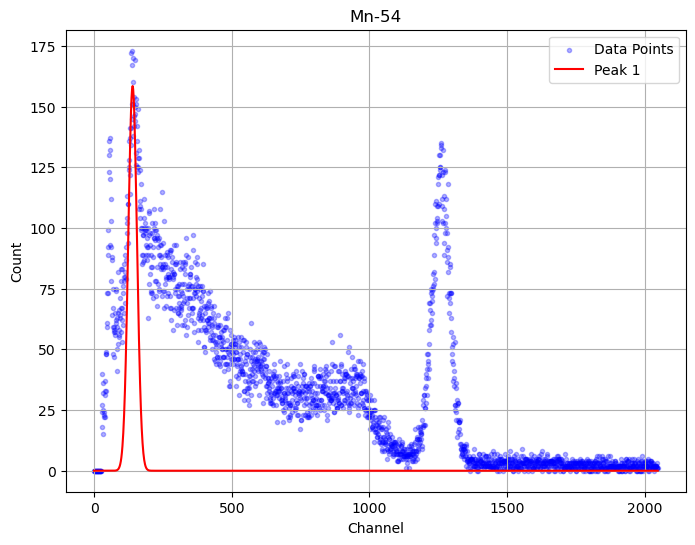

In [9]:
data = py.loadtxt('DataCSVFiles/Mn-54data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [138, 173]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Mn-54')
plt.legend()
plt.grid(True)
plt.show()

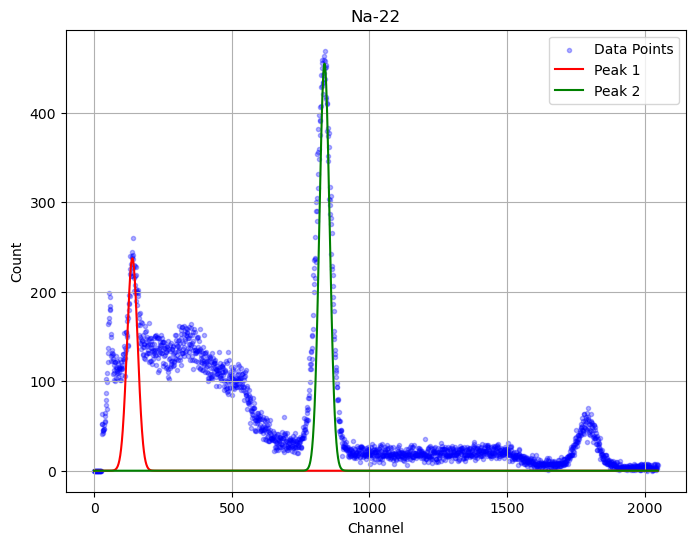

In [10]:
data = py.loadtxt('DataCSVFiles/Na-22data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [138, 244],
    [840, 469]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Na-22')
plt.legend()
plt.grid(True)
plt.show()

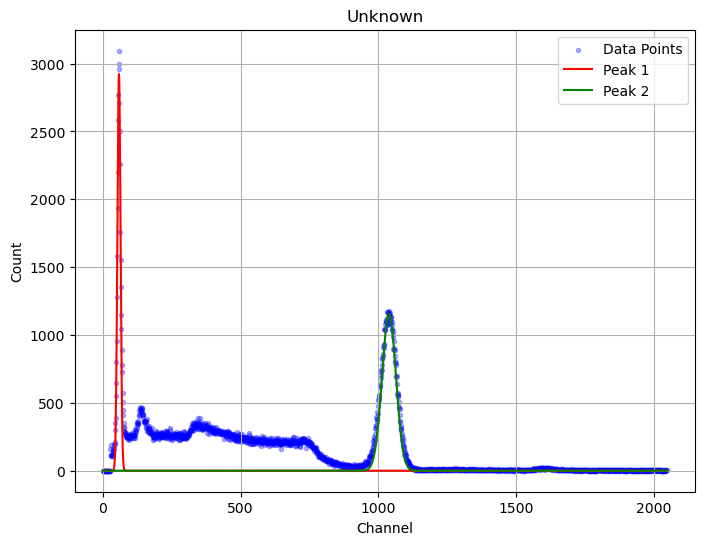

In [11]:
data = py.loadtxt('DataCSVFiles/Unknowndata.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [59, 3095],
    [1040, 1177]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Unknown')
plt.legend()
plt.grid(True)
plt.show()